Astronomical data analysis using Python
=======

Lecture 9
-----------------



Learning Outcomes
----------------

After this lecture, you should be able to:

1. Work with Astronomical Tables using Astropy
    - Sort and manipulate table data
    - Group table entries
    - Write tables in various formats (FITS, ASCII, etc.)

2. Handle Coordinate Systems using SkyCoord
    - Work with celestial coordinates (RA, Dec)
    - Perform coordinate transformations
    - Calculate separations and distances

3. Process FITS Files
    - Read and write FITS files
    - Access header information
    - Manipulate image data
    - Understand axis conventions

4. Work with World Coordinate Systems (WCS)
    - Convert between pixel and sky coordinates
    - Handle coordinate transformations
    - Calculate image footprints

5. Use Common Astronomical Tools
    - Understand the roles of TOPCAT, Aladin, and DS9
    - Work with Virtual Observatory protocols

Table
=====

In [1]:
from astropy.table import Table
demo_table = Table.read("demo.txt", format="ascii")
print (demo_table)

name  obs_date  mag_b mag_v
---- ---------- ----- -----
 M31 2012-01-02  17.0  17.5
 M31 2012-01-02  17.1  17.4
M101 2012-01-02  15.1  13.5
 M82 2012-02-14  16.2  14.5
 M31 2012-02-14  16.9  17.3
 M82 2012-02-14  15.2  15.5
M101 2012-02-14  15.0  13.6
 M82 2012-03-26  15.7  16.5
M101 2012-03-26  15.1  13.5
M101 2012-03-26  14.8  14.3


In [2]:
demo_table.sort(["name", "mag_b"]) # sort by name, then magb

In [3]:
print (demo_table)

name  obs_date  mag_b mag_v
---- ---------- ----- -----
M101 2012-03-26  14.8  14.3
M101 2012-02-14  15.0  13.6
M101 2012-01-02  15.1  13.5
M101 2012-03-26  15.1  13.5
 M31 2012-02-14  16.9  17.3
 M31 2012-01-02  17.0  17.5
 M31 2012-01-02  17.1  17.4
 M82 2012-02-14  15.2  15.5
 M82 2012-03-26  15.7  16.5
 M82 2012-02-14  16.2  14.5


In [4]:
demo_table.reverse() # Reverse existing table. Descending order!
print (demo_table)

name  obs_date  mag_b mag_v
---- ---------- ----- -----
 M82 2012-02-14  16.2  14.5
 M82 2012-03-26  15.7  16.5
 M82 2012-02-14  15.2  15.5
 M31 2012-01-02  17.1  17.4
 M31 2012-01-02  17.0  17.5
 M31 2012-02-14  16.9  17.3
M101 2012-03-26  15.1  13.5
M101 2012-01-02  15.1  13.5
M101 2012-02-14  15.0  13.6
M101 2012-03-26  14.8  14.3


# Writing a table

In [5]:
demo_table.write('reversesortedtable.fits', format='fits', overwrite=True)  

Many output formats are available: ascii (many variants like csv, with and without headers), hdf5, votable, fits, latex etc. All these formats can be read from as well. 

Table Groups
----

* It is possible to organize the table into groups. 
* For example, all entries for object M101 can be selected as a single group.
* One can access individual groups for various operations.
* Also supported "group-wise reductions"

In [6]:
demo_table = Table.read("demo.txt", format="ascii")
grouped_table = demo_table.group_by("name") 

In [7]:
# To access groups.
print (grouped_table.groups[0]) # first group

name  obs_date  mag_b mag_v
---- ---------- ----- -----
M101 2012-01-02  15.1  13.5
M101 2012-02-14  15.0  13.6
M101 2012-03-26  15.1  13.5
M101 2012-03-26  14.8  14.3


Group-wise Reductions (e.g. group-wise mean)
----

In [8]:
import numpy
grouped_table.groups.aggregate(numpy.mean)

name,mag_b,mag_v
str4,float64,float64
M101,15.000000000000002,13.725000000000001
M31,17.0,17.400000000000002
M82,15.699999999999998,15.5


Filters
----

* Define a function <code> some_filter( TableObject, KeyColumns ) </code>.
* The function returns `True` or `False`.
* Then use the function to remove rows which satisfy some condition.

The following will select all table groups with only positive values in the non- key columns:

<code>
def all_positive(table, key_colnames):
    colnames = [name for name in table.colnames if name not in key_colnames]
    for colname in colnames:
         if np.any(table[colname] <= 0):
             return False
         return True
t_positive = tg.groups.filter(all_positive)`
</code>

Stuff For You To Explore On Your Own
====

Stacks - vstack, hstack
---

"joins"
---

https://docs.astropy.org/en/stable/table/operations.html



# Useful generic tools for handling astronomical data

* **Topcat**: Interactive viewer and editor for tabular data. Can handle data in many formats, and includes tools for making many different kinds of plots.
* **Aladin**: interactive sky atlas allowing the user to visualize digitized astronomical images or full surveys, 
superimpose entries from astronomical catalogues
* **DS9**: is an alternative to Aladin. It provides many of the features that Aladin has in a fast, lightweight interface.

All of these tools are tightly integrated with each other, all follow **Virtual Obervatory protocols** and can exchange data with each other. Even if you are going to process all your data through a Python program, it is important that you become proficient in the use of these tools, so that you can easily do quality checks on your analysis.

# SkyCoord - generic object for coordinates

In [9]:
from astropy.coordinates import SkyCoord
import astropy.units as u
c = SkyCoord(ra=10.68458*u.degree, dec=41.26917*u.degree)
print (c)
print (c.ra)
print (c.ra.hour)
print (c.ra.hms)
print (c.dec.degree)
print (c.dec.radian)
print (c.galactic)
print (c.fk4)

<SkyCoord (ICRS): (ra, dec) in deg
    (10.68458, 41.26917)>
10d41m04.488s
0.7123053333333335
hms_tuple(h=0.0, m=42.0, s=44.299200000000525)
41.26917
0.7202828960652683
<SkyCoord (Galactic): (l, b) in deg
    (121.17424181, -21.57288557)>
<SkyCoord (FK4: equinox=B1950.000, obstime=B1950.000): (ra, dec) in deg
    (10.00026791, 40.99534531)>


# 3D and angular separation

In [10]:
c1 = SkyCoord(ra=10*u.degree, dec=9*u.degree, distance=10*u.pc, frame='icrs')
c2 = SkyCoord(ra=11*u.degree, dec=10*u.degree, distance=11.5*u.pc, frame='icrs')
print (c1.separation_3d(c2))
print (c1.separation(c2))

1.5228602415117987 pc
1d24m16.34302012s


# Radial velocity correction

In [11]:
from astropy.coordinates import EarthLocation
from astropy.time import Time
obstime = Time('2017-2-14')
target = SkyCoord.from_name('M31')  # needs internet connection
pune = EarthLocation.of_address('Pune, India')  # needs internet connection
target.radial_velocity_correction(obstime=obstime, location=pune).to('km/s')  
# apply correction to get heliocentric radial velocity accurate to about 3 m/s

<Quantity -22.33286169 km / s>

FITS Files in Python
=====================

Again, if this talk was being given few years ago, we would cover 

PyFITS
------

But now, 

astropy.io.fits
---------------

First step, import the (sub) module.
-----------------

In [12]:
from astropy.io import fits

If you are using old code that uses PyFits you can say, 

    import astropy.io.fits as pyfits

or whatever alias you use for PyFITS and most of PyFITS based code should work fine.

Next step, open a FITS file. The method used for this creates a hdulist object. HDU = Header Data Unit

In [13]:
hdulist = fits.open("example.fits") # example.fits is a sample image on my computer.

Next, check up some basic information about the FITS file.

In [14]:
hdulist.info()

Filename: example.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      71   (512, 512)   int16   


As you can see, this is a single extension FITS file.

Accessing the FITS header
-------------------

In [15]:
hdulist[0].header

SIMPLE  =                    T / Fits standard                                  
BITPIX  =                   16 / Bits per pixel                                 
NAXIS   =                    2 / Number of axes                                 
NAXIS1  =                  512 / Axis length                                    
NAXIS2  =                  512 / Axis length                                    
EXTEND  =                    F / File may contain extensions                    
ORIGIN  = 'NOAO-IRAF FITS Image Kernel July 2003' / FITS file originator        
DATE    = '2017-02-17T04:36:31' / Date FITS file was generated                  
IRAF-TLM= '2017-02-17T04:36:31' / Time of last modification                     
OBJECT  = 'm51  B  600s'       / Name of the object observed                    
IRAF-MAX=           1.993600E4  /  DATA MAX                                     
IRAF-MIN=          -1.000000E0  /  DATA MIN                                     
CCDPICNO=                   

Specific stuff within header.
-------------------------

In [16]:
hdulist[0].header["NAXIS1"] # by header keyword

512

In [17]:
hdulist[0].header[1] # or by header number.

16

In [18]:
all_keys = hdulist[0].header.keys() # get a list of all keys.

In [19]:
all_values = hdulist[0].header.values()

You can also change the header values as if it were a dictionary.

Now, the data
---------------



In [20]:
import matplotlib.pyplot as plt
import numpy as np

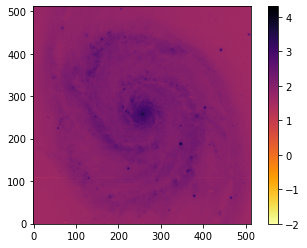

In [21]:
plt.set_cmap('inferno_r')
plt.imshow( np.log10(hdulist[0].data+abs(np.min(hdulist[0].data))+0.01),origin='lower')
# Flat is better than nested - Zen of Python. We violated that and made the code difficult to read.
# Don't do this!
plt.colorbar()

Axis Conventions
----------------

If you load a FITS image in Python, in FORTRAN/C or in ds9, the image viewer, what does I(X,Y) can give you different results!!! Also remember the zero origin versus one origin problem.

There is a difference in whether the following code moves along horizontal axis first or vertical axis first.

    for x in range(header["NAXIS1"]):
        for y in range(header["NAXIS2"]):
           
            
**This gets really complicated when you have datacubes which produce 3-D arrays. Jupyter notebook to imshow the image. Also load image in ds9. Do a bit of fiddling around and write your loops! In most cases when you work with the whole image, you don't have to worry. While writing out a fits file, the y,x are reinverted automatically**

In [22]:
im = hdulist[0].data
print (im[461,68]) # this corresponds to 69,462 in the ds9 image. Display the image and verify it.
hdulist.close()

338


Writing FITS files
-------------------

If you have a HDUlist object, you simply say,

    hdulist.writeto("outputfilename.fits")
    
If you want to make a file from scratch, create a dictionary of headers and the data array.

    primaryhdu = fits.PrimaryHDU(data, header)
    primaryhdu.writeto("something.fits")
    


World Coordinate Systems
========================

Few years ago, 

    import pywcs 
    
In the era of Astropy, 

    from astropy import wcs
    
Funtionally, they are more or less the same.

Create a WCS object.
--------------------

In [23]:
from astropy import wcs
w = wcs.WCS("1105_160859.fits") # cutout image from the 1.4 GHz VLA FIRST sky survey 

While the above is allowed, taking into account that FITS files can have multiple extensions, you should,

In [24]:
hdulist = fits.open("1105_160859.fits")
w = wcs.WCS(hdulist[0].header)
print (w)
hdulist.close()

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---SIN'  'DEC--SIN'  
CRVAL : 34.3492317  -3.9826033  
CRPIX : 18.3727199548739  18.44725428547099  
CD1_1 CD1_2  : -0.0005555555555556  0.0  
CD2_1 CD2_2  : 0.0  0.0005555555555556  
NAXIS : 35  35


It's the WCS object which has methods to perform any coordinate transformations.

In [25]:
from astropy.wcs import utils
print (utils.pixel_to_skycoord(5,25,w,origin=1)) # Functional form

<SkyCoord (ICRS): (ra, dec) in deg
    (34.35667894, -3.97896285)>


In [26]:
w.wcs_pix2world(5, 25, 1) # OOP form

[array(34.35667894), array(-3.97896285)]

* Which pixel? (5, 25) or (6, 26). It's (5,25), the third argument 1 assures you that.
* Difference between wcs_pix2world and all_pix2world - the latter takes into account some higher order transformations / corrections into account.
* Output? (RA, DEC) in degrees.

To do a reverse transformation.

In [27]:
w.wcs_world2pix(34.35,-3.97, 1)

[array(16.99309841), array(41.13319346)]

In [28]:
w.calc_footprint() # The four corners of an image.

array([[34.35890669, -3.99229616],
       [34.35890647, -3.97340727],
       [34.33997206, -3.97340728],
       [34.33997185, -3.99229617]])

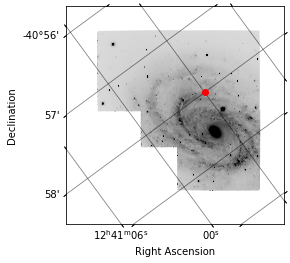

In [29]:
from astropy.wcs import WCS
from astropy.visualization import ZScaleInterval
from astropy.coordinates import SkyCoord
hdulist = fits.open('h_n4603_f555_mosaic.fits')
wcs = WCS(hdulist[0].header)
interval = ZScaleInterval()
vmin,vmax = interval.get_limits(hdulist[0].data)
ax = plt.subplot(111, projection=wcs)
ax.imshow(hdulist[0].data, cmap='gray_r', vmin=vmin, vmax=vmax, interpolation=None, origin='lower')
ax.set_xlabel("Right Ascension"); ax.set_ylabel("Declination")
ax.coords.grid(color='black', alpha=0.5, linestyle='solid')
ax.plot_coord(SkyCoord("12h40m54s","-40d58m0s", frame="fk5"), "ro")
hdulist.close()
